# Evaluation of all Efficacy Models

In [1]:
# IMPORTS

from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from mypackage.config import *
from mypackage.utils import *


In [2]:
# LOADING MODELS WITH DATA

model_names = ("rf_v1.0", "rf_v1.1", "hgb_v1.0", "hgb_v1.1", "rf_v1.2", "hgb_v1.2")
models = {}

for model_name in model_names:

    model = load_model(model_name, MODELS_EFFICACY)
    df_data = pd.read_pickle(DATA_PROCESSED_EFFICACY / f"{model.dataset_id}")
    
    models.update({model_name: [model, df_data]})

Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/rf_v1.0.joblib
Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/rf_v1.1.joblib
Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/hgb_v1.0.joblib
Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/hgb_v1.1.joblib
Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/rf_v1.2.joblib
Model loaded from /Users/thewildchip/Desktop/Coding/crispr-genie-lab-jf/models/efficacy/hgb_v1.2.joblib


In [3]:
all_evaluations = {}
for model_name, (model, model_df) in models.items():
    _, val_X, _, val_y = load_data(model_df)
    y_pred = model.predict(val_X)
    all_evaluations[model_name] = evaluate_model(val_y, y_pred)

all_evaluations

{'rf_v1.0': {'R2': 0.2984023263974934,
  'MAE': 0.10370235253790555,
  'MSE': 0.018890010304725712,
  'RMSE': np.float64(0.13744093387606807)},
 'rf_v1.1': {'R2': 0.2951570622957629,
  'MAE': 0.10360990965178675,
  'MSE': 0.01897738669525516,
  'RMSE': np.float64(0.13775843602210053)},
 'hgb_v1.0': {'R2': 0.16454303561908867,
  'MAE': 0.11782512173230753,
  'MSE': 0.022494074966462222,
  'RMSE': np.float64(0.14998024858781314)},
 'hgb_v1.1': {'R2': 0.15914235016729217,
  'MAE': 0.11777654874860345,
  'MSE': 0.022639484519081148,
  'RMSE': np.float64(0.1504642300318622)},
 'rf_v1.2': {'R2': 0.29506264690576445,
  'MAE': 0.10344565899866316,
  'MSE': 0.0189799287613952,
  'RMSE': np.float64(0.1377676622484217)},
 'hgb_v1.2': {'R2': 0.15914235016729217,
  'MAE': 0.11777654874860345,
  'MSE': 0.022639484519081148,
  'RMSE': np.float64(0.1504642300318622)}}

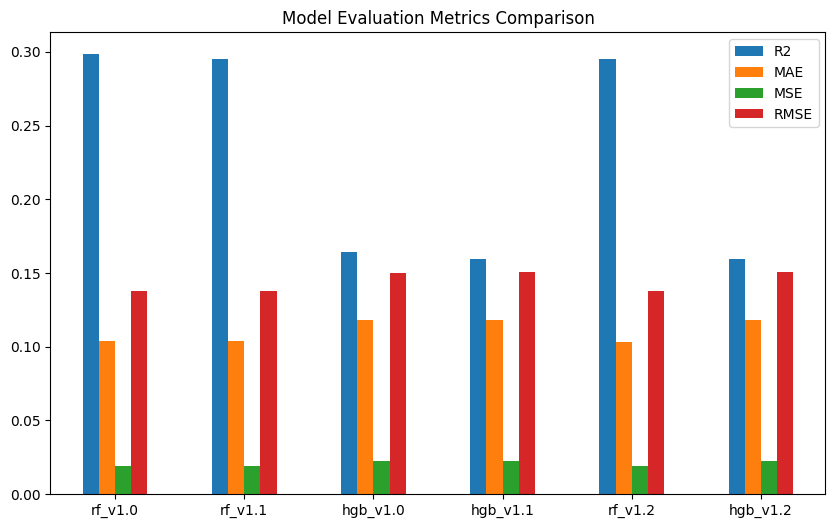

In [4]:
df_res = pd.DataFrame.from_dict(all_evaluations, orient='index')
df_res.plot.bar(rot=0, figsize=(10,6), title="Model Evaluation Metrics Comparison")
# sns.heatmap(df_res, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Metric Value'})
# plt.title("Model Evaluation Metrics Heatmap")
plt.show()